<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram, linkage

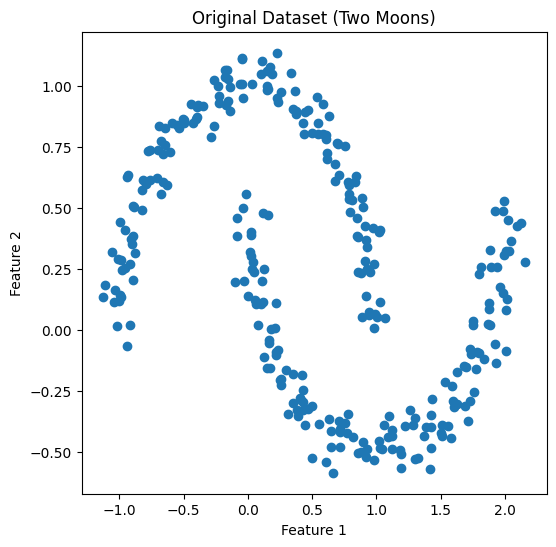

In [19]:
X, y = make_moons(n_samples=300, noise=0.06, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1])
plt.title("Original Dataset (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

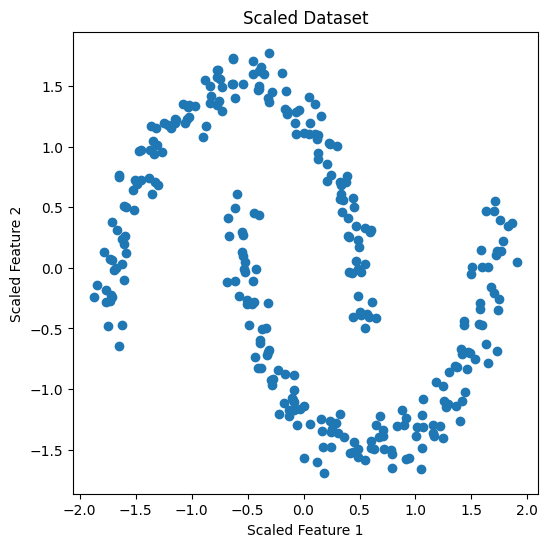

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.title("Scaled Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()

In [21]:
#DBScan
dbscan = DBSCAN(eps=0.2,min_samples=3)

In [22]:
db_labels = dbscan.fit_predict(X_scaled)

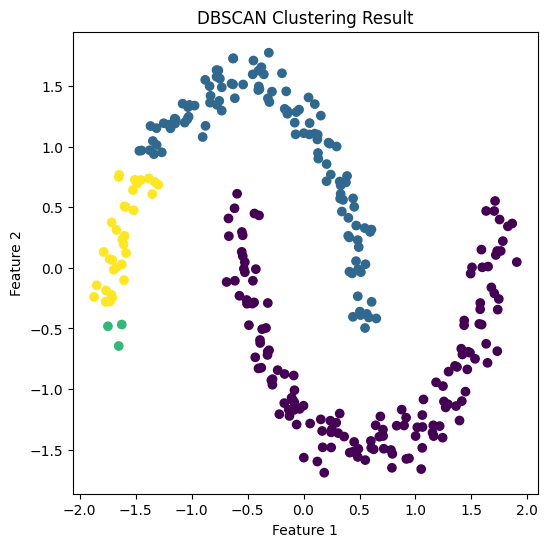

Unique cluster labels: [0 1 2 3]


In [23]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=db_labels, cmap='viridis')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Unique cluster labels:", np.unique(db_labels))

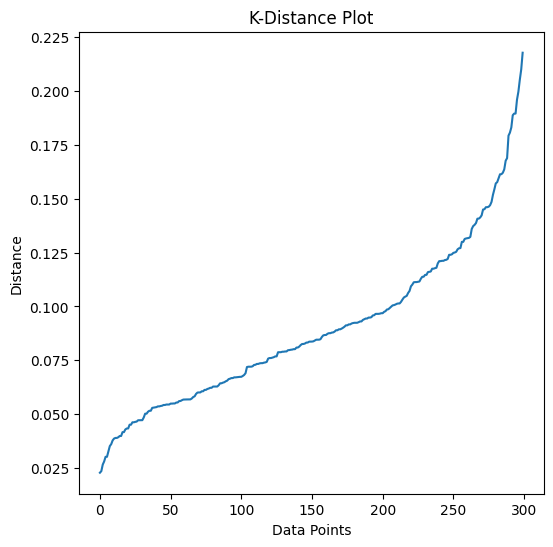

In [25]:
#Choosing eps using k-distance Plot
neighbor = NearestNeighbors(n_neighbors=3)
nei_fit = neighbor.fit(X_scaled)
distances, indices = nei_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,2])

plt.figure(figsize=(6,6))
plt.plot(distances)
plt.title("K-Distance Plot")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Hierarchical Clustering Implementation

In [29]:
hc = AgglomerativeClustering(n_clusters=6,linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

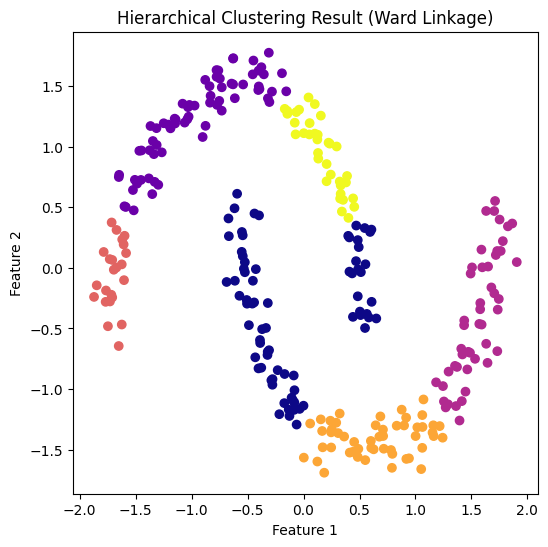

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

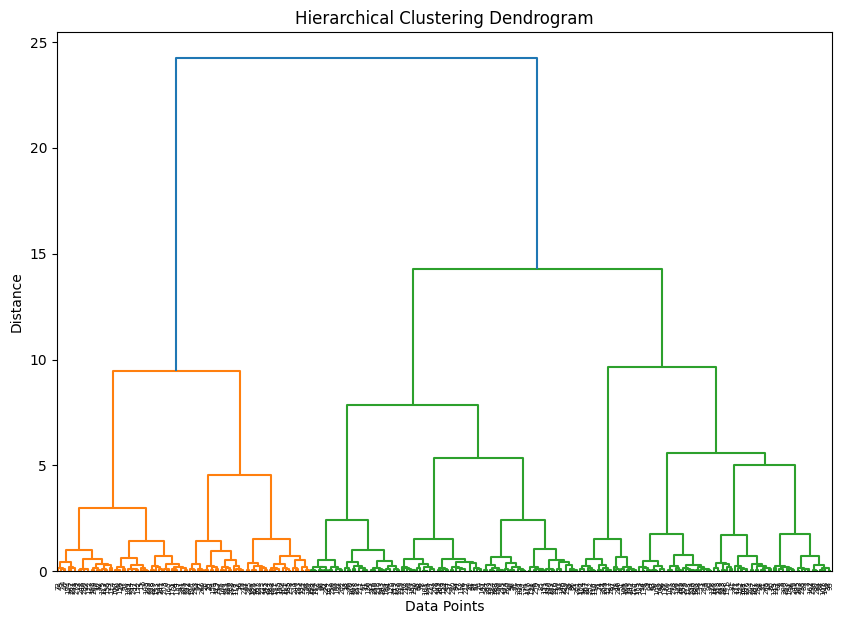

In [31]:
linked = linkage(X_scaled,method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
